# R: Part 0 - Basics, dplyr, and ggplot2
***
## 1. Standard output

Two primary R core functions are used to print information to the console:
* `print()`: a generic function that responds differently to different classes of R objects
* `cat()`: simply attempts to print string literals

In [2]:
x <- 'Hello World!'
print(x)
cat(x)
x

class(x) <- 'some.class' # '.' is just a character, it does not denote object membership
print(x)
cat(x) 

[1] "Hello World!"
Hello World!

[1] "Hello World!"

[1] "Hello World!"
attr(,"class")
[1] "some.class"
Hello World!

In [3]:
# An object with no functions or operators is also printed to the console
x 

[1] "Hello World!"
attr(,"class")
[1] "some.class"

***
## 2. Importing libraries

R contains thousands of packages for many different purposes

Packages are:
* Nearly always free and open source
* Installed using the `install.packages()` function or a GUI command
* Of varying quality and licensing
* Loaded using the `library()` function, after being installed

In [4]:
library(dplyr)    # popular package for data wrangling with consistent syntax
library(ggplot2)  # popular package for plotting with consistent syntax

***
## 3. Setting the working directory

#### Enter the directory location of this file within single quotes

In [5]:
# '<-' is the preferred assignment operator in R
# '/' is the safest directory separator character to use

git_dir <- 'C:/workspace/GWU_data_mining/01_basic_data_prep/src/notebooks/r'

#### Set the working directory

* The working directory is where files are written to and read from by default
* `setwd()` sets the working directory
* `getwd()` prints the current working directory

In [6]:
setwd(git_dir)
getwd()

[1] "C:/workspace/GWU_data_mining/01_basic_data_prep/src/notebooks"

***
## 4. Generating a sample data set

#### Set the number of rows and columns for the sample data set

In [7]:
n_rows <- 1000
n_vars <- 2

#### Create a key variable
* A key variable has a unique value for each row of a data set
* `seq()` generates values from a number (default = 1), to another number, by a certain value (default = 1)
* Many types of data structures in R have key variables (a.k.a. row names) by default

In [8]:
key <- seq(n_rows)

#### Show the first five elements of `key`

Most data structures in R can be 'sliced', i.e. using numeric indices to select a subset of items 

In [9]:
key[1:5] 

[1] 1 2 3 4 5

#### Create lists of strings that will become column names

`paste()` concatentates strings with a separator character in between them

In [10]:
num_vars <- paste('numeric', seq_len(n_vars), sep = '')
num_vars 

char_vars <- paste('char', seq_len(n_vars), sep = '')
char_vars

[1] "numeric1" "numeric2"

[1] "char1" "char2"

#### Initialize a data.frame with the key variable

In [11]:
scratch_df <- data.frame(INDEX = key)

# head() displays the top of a data structure
head(scratch_df) 

INDEX
1
2
3
4
5
6


#### Add n_var numeric columns, each with n_row rows, to the data.frame
* Each column contains random uniform numeric values generated by runif()
* `replicate()` replicates `n_row` length lists of numeric values `n_vars` times

In [12]:
scratch_df[, num_vars] <- replicate(n_vars, runif(n_rows))
head(scratch_df)

INDEX,numeric1,numeric2
1,0.7660519,0.8612940
2,0.6655444,0.4245875
3,0.1249906,0.7921288
4,0.8783229,0.6293515
5,0.9762042,0.6977630
6,0.1545786,0.2830556


#### Add n_var character columns, each with n_row rows, to the data.frame
* Create a list of strings from which to generate random text variables
* `sapply()` applies a function to a sequence of values
* `LETTERS` is a character vector containing uppercase letters
* An anonymous function is defined that replicates a value 8 times with no seperator character
* `replicate()` replicates n_var lists of n_row elements from text_draw sampled randomly from `test_draw` using the `sample()` function

In [13]:
text_draw <- sapply(LETTERS[1:7],
                    FUN = function(x) paste(rep(x, 8), collapse = ""))
text_draw                                     

A          B          C          D          E          F          G 
"AAAAAAAA" "BBBBBBBB" "CCCCCCCC" "DDDDDDDD" "EEEEEEEE" "FFFFFFFF" "GGGGGGGG"

In [14]:
scratch_df[, char_vars] <- replicate(n_vars,
                                     sample(text_draw, n_rows, replace = TRUE))
head(scratch_df) 

INDEX,numeric1,numeric2,char1,char2
1,0.7660519,0.8612940,GGGGGGGG,FFFFFFFF
2,0.6655444,0.4245875,GGGGGGGG,DDDDDDDD
3,0.1249906,0.7921288,DDDDDDDD,BBBBBBBB
4,0.8783229,0.6293515,CCCCCCCC,FFFFFFFF
5,0.9762042,0.6977630,EEEEEEEE,BBBBBBBB
6,0.1545786,0.2830556,FFFFFFFF,FFFFFFFF


#### Convert from standard data.frame to dlpyr table
* `dplyr` is a popular, intuitive, and effcient package for manipulating data sets
* R has many other data types, here are few: http://www.statmethods.net/input/datatypes.html

In [15]:
scratch_tbl <- tbl_df(scratch_df)

#### Use the dplyr::glimpse function to see a summary of the generated data set 

`<package>::<method>` notation is used to specify a method (or function) is a member of certain package, i.e. in the 'namespace' of a certain package


In [16]:
glimpse(scratch_tbl)

Observations: 1,000
Variables: 5
$ INDEX    <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,...
$ numeric1 <dbl> 0.76605192, 0.66554438, 0.12499060, 0.87832286, 0.97620417...
$ numeric2 <dbl> 0.86129400, 0.42458752, 0.79212882, 0.62935148, 0.69776296...
$ char1    <chr> "GGGGGGGG", "GGGGGGGG", "DDDDDDDD", "CCCCCCCC", "EEEEEEEE"...
$ char2    <chr> "FFFFFFFF", "DDDDDDDD", "BBBBBBBB", "FFFFFFFF", "BBBBBBBB"...


***
## 5. Plotting variables in a table

#### Use  `ggplot` to plot univariate densities of numeric1 and char1 with `geom_bar()`
* `ggplot` allows you to overlay graphics using the '+' operator
* `gtitle` adds title
* `coord_flip` rotates the bar chart

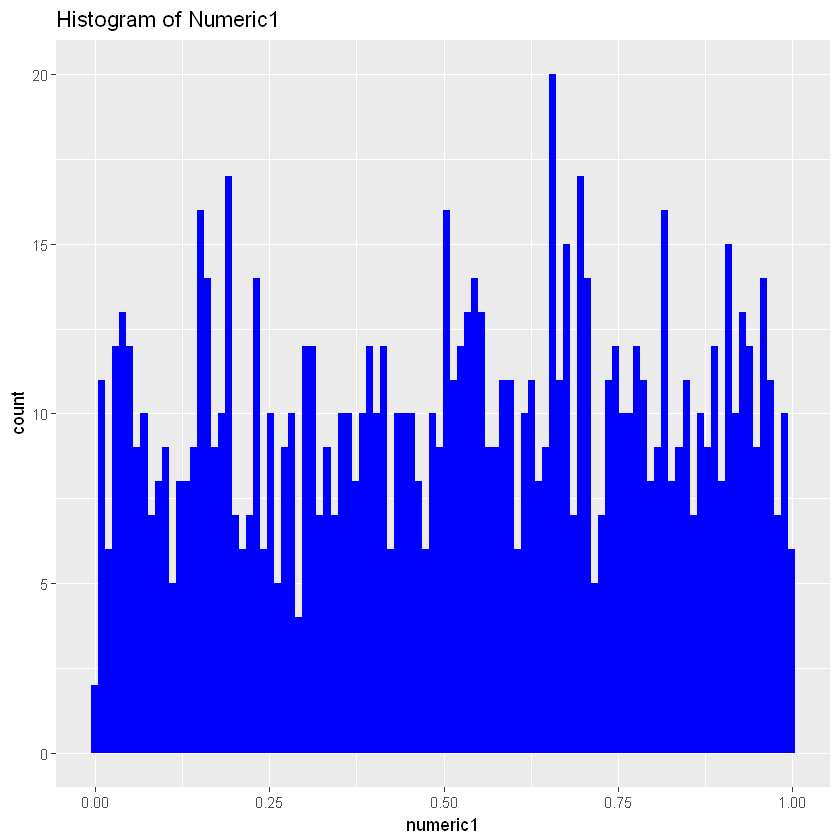

In [17]:
ggplot(scratch_tbl, aes(numeric1)) +
  geom_bar(stat = "bin", fill = "blue", bins = 100) +
  ggtitle('Histogram of Numeric1')

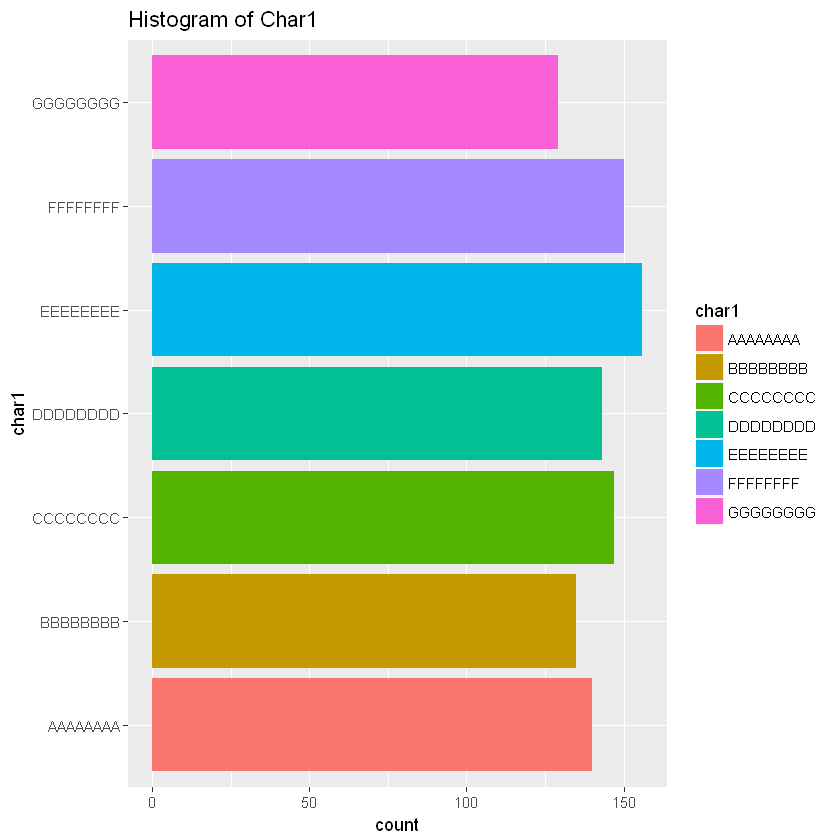

In [18]:
ggplot(scratch_tbl, aes(char1)) +
  geom_bar(aes(fill=char1)) +
  ggtitle('Histogram of Char1') +
  coord_flip()

***
## 6. Subsetting tables

#### Subset columns using `dplyr::select`

Subset a range of variables with similar names and numeric suffixes

In [19]:
num_vars <- select(scratch_tbl, num_range('numeric', 1:n_vars))
head(num_vars)

numeric1,numeric2
0.7660519,0.8612940
0.6655444,0.4245875
0.1249906,0.7921288
0.8783229,0.6293515
0.9762042,0.6977630
0.1545786,0.2830556


Subset all the variables whose names begin with 'char'

In [20]:
char_vars <- select(scratch_tbl, starts_with('char'))
head(char_vars)

char1,char2
GGGGGGGG,FFFFFFFF
GGGGGGGG,DDDDDDDD
DDDDDDDD,BBBBBBBB
CCCCCCCC,FFFFFFFF
EEEEEEEE,BBBBBBBB
FFFFFFFF,FFFFFFFF


Subset variables by their names

In [21]:
mixed_vars <- select(scratch_tbl, one_of('numeric1', 'char1'))
head(mixed_vars)

numeric1,char1
0.7660519,GGGGGGGG
0.6655444,GGGGGGGG
0.1249906,DDDDDDDD
0.8783229,CCCCCCCC
0.9762042,EEEEEEEE
0.1545786,FFFFFFFF


#### Subset columns with several different `dplyr` methods

Subset/slice rows using their numeric indices

In [22]:
some_rows <- slice(scratch_tbl, 1:10)
some_rows

INDEX,numeric1,numeric2,char1,char2
1,0.7660519,0.8612940,GGGGGGGG,FFFFFFFF
2,0.6655444,0.4245875,GGGGGGGG,DDDDDDDD
3,0.1249906,0.7921288,DDDDDDDD,BBBBBBBB
4,0.8783229,0.6293515,CCCCCCCC,FFFFFFFF
5,0.9762042,0.6977630,EEEEEEEE,BBBBBBBB
6,0.1545786,0.2830556,FFFFFFFF,FFFFFFFF
7,0.6206734,0.7125239,DDDDDDDD,CCCCCCCC
8,0.5305409,0.2518846,EEEEEEEE,DDDDDDDD
9,0.6157465,0.3307308,FFFFFFFF,BBBBBBBB
10,0.9590691,0.6889828,EEEEEEEE,GGGGGGGG


Subset top rows based on the value of a certain variable

In [23]:
sorted_top_rows <- top_n(scratch_tbl, 10, numeric1)
sorted_top_rows 

INDEX,numeric1,numeric2,char1,char2
139,0.9907722,0.37407206,BBBBBBBB,CCCCCCCC
190,0.9923552,0.43110734,AAAAAAAA,BBBBBBBB
342,0.9955218,0.66555835,AAAAAAAA,BBBBBBBB
413,0.9929755,0.16846015,GGGGGGGG,FFFFFFFF
477,0.9971685,0.70005867,BBBBBBBB,DDDDDDDD
567,0.9924111,0.12578708,GGGGGGGG,EEEEEEEE
886,0.9968450,0.13595340,EEEEEEEE,EEEEEEEE
924,0.9950005,0.56680152,EEEEEEEE,EEEEEEEE
951,0.9996092,0.07518348,DDDDDDDD,EEEEEEEE
971,0.9969630,0.22729580,AAAAAAAA,CCCCCCCC


Subset rows where a certain variable has a certain value

In [24]:
AAAAAAAA_rows <- filter(scratch_tbl, char1 == 'AAAAAAAA')
head(AAAAAAAA_rows)

INDEX,numeric1,numeric2,char1,char2
14,0.2924441,0.3092568,AAAAAAAA,CCCCCCCC
19,0.5300212,0.6684989,AAAAAAAA,EEEEEEEE
28,0.5483687,0.4469339,AAAAAAAA,GGGGGGGG
32,0.3680773,0.6349562,AAAAAAAA,FFFFFFFF
35,0.8888657,0.2055340,AAAAAAAA,EEEEEEEE
47,0.1564200,0.5824652,AAAAAAAA,EEEEEEEE


***
## 7. Updating a table
`dplyr`, as a best practice, does not support in-place overwrites of data 

`dplyr::transform` enables the creation of new variables from existing variables

In [25]:
scratch_tbl2 <- transform(scratch_tbl, 
                          new_numeric = round(numeric1, 1))
head(scratch_tbl2)

INDEX,numeric1,numeric2,char1,char2,new_numeric
1,0.7660519,0.8612940,GGGGGGGG,FFFFFFFF,0.8
2,0.6655444,0.4245875,GGGGGGGG,DDDDDDDD,0.7
3,0.1249906,0.7921288,DDDDDDDD,BBBBBBBB,0.1
4,0.8783229,0.6293515,CCCCCCCC,FFFFFFFF,0.9
5,0.9762042,0.6977630,EEEEEEEE,BBBBBBBB,1.0
6,0.1545786,0.2830556,FFFFFFFF,FFFFFFFF,0.2


`dplyr::mutate` enables the creation of new variables from existing variables and computed variables

In [26]:
scratch_tbl2 <- mutate(scratch_tbl, 
                       new_numeric = round(numeric1, 1), 
                       new_numeric2 = new_numeric * 10)
head(scratch_tbl2)

INDEX,numeric1,numeric2,char1,char2,new_numeric,new_numeric2
1,0.7660519,0.8612940,GGGGGGGG,FFFFFFFF,0.8,8
2,0.6655444,0.4245875,GGGGGGGG,DDDDDDDD,0.7,7
3,0.1249906,0.7921288,DDDDDDDD,BBBBBBBB,0.1,1
4,0.8783229,0.6293515,CCCCCCCC,FFFFFFFF,0.9,9
5,0.9762042,0.6977630,EEEEEEEE,BBBBBBBB,1.0,10
6,0.1545786,0.2830556,FFFFFFFF,FFFFFFFF,0.2,2


`dplyr::transmute` enables the creation of new variables from existing variables and computed variables, but keeps only newly created variables

In [27]:
scratch_tbl2 <- transmute(scratch_tbl, 
                          new_numeric = round(numeric1, 1), 
                          new_numeric2 = new_numeric * 10)
head(scratch_tbl2)

new_numeric,new_numeric2
0.8,8
0.7,7
0.1,1
0.9,9
1.0,10
0.2,2


***
## 8. Sorting a table 
Sort tables by one variable or more variables using `dplyr::arrange`

In [28]:
# one sort var: char1
sorted <- arrange(char_vars, char1)
head(sorted)

char1,char2
AAAAAAAA,CCCCCCCC
AAAAAAAA,EEEEEEEE
AAAAAAAA,GGGGGGGG
AAAAAAAA,FFFFFFFF
AAAAAAAA,EEEEEEEE
AAAAAAAA,EEEEEEEE


In [29]:
# two sort vars: char1, char2
sorted2 <- arrange(char_vars, char1, char2)
head(sorted2)

char1,char2
AAAAAAAA,AAAAAAAA
AAAAAAAA,AAAAAAAA
AAAAAAAA,AAAAAAAA
AAAAAAAA,AAAAAAAA
AAAAAAAA,AAAAAAAA
AAAAAAAA,AAAAAAAA


***
## 9. Adding data to the table
Add data to a table using `dplyr:: bind` and `dplyr::join`
* Bind methods smash tables together
  * `bindr` stacks data sets vertically
  * `bindc` combines data sets horizontally
* `join` combines tables based on matching values of a shared key (or 'by') variable

In [30]:
bindr <- bind_rows(sorted, sorted2)
nrow(bindr) #nrow - number of rows

[1] 2000

In [31]:
bindc <- bind_cols(sorted, sorted2)
ncol(bindc) # ncol - number of columns

[1] 4

#### Create two tables to join on a key variable 

In [32]:
sorted_left <- arrange(select(scratch_tbl, one_of('INDEX', 'char1')), char1)
right <- select(scratch_tbl, one_of('INDEX', 'numeric1'))

#### Perform join
Joined table contains `char1` from the left table and `numeric1` from the right table matched by the value of `INDEX`

In [33]:
joined <- left_join(sorted_left, right, by = 'INDEX')
head(joined)

INDEX,char1,numeric1
14,AAAAAAAA,0.2924441
19,AAAAAAAA,0.5300212
28,AAAAAAAA,0.5483687
32,AAAAAAAA,0.3680773
35,AAAAAAAA,0.8888657
47,AAAAAAAA,0.1564200


***
## 10. Comparing tables using `dplyr::all.equal`
* `dplyr::all.equal` will test tables for equality despite the order of rowsand/or columns
* Very useful for keeping track of changes to important tables

#### Create a table for comparision 
`test` will have the same values as `joined` but in a different order

In [34]:
test <- select(scratch_tbl, one_of('INDEX', 'numeric1', 'char1'))

#### Perform comparisons

In [35]:
print(all.equal(joined, test, ignore_row_order = FALSE))

[1] "Same row values, but different order"


In [36]:
print(all.equal(joined, test, ignore_col_order = FALSE))

[1] "Same column names, but different order"


In [37]:
print(all.equal(joined, test))

[1] TRUE


***
## 11. Summarizing tables
Combine rows of tables into summary values, like means or sums, using:
* `dplyr::summarise` 
* `dplyr::summarise_each`

In [38]:
ave <- summarise(num_vars, avg = mean(numeric1)) # avg is the name of the new variable
ave

avg
0.5148242


In [39]:
all_aves <-summarise_each(num_vars, funs(mean)) # funs() defines the summary function
all_aves

numeric1,numeric2
0.5148242,0.5127149


***
## 12. By group processing
By groups allow you to divide and process a data set based on the values of a certain variable
* `dplyr::group_by` groups a data set together based on the values of a certain variable
* Operations can then be applied to groups

In [40]:
grouped <- group_by(joined, char1)

In [41]:
grouped <- summarise(grouped, avg = mean(numeric1)) # avg is the name of the new variable
grouped

char1,avg
AAAAAAAA,0.5554806
BBBBBBBB,0.5145690
CCCCCCCC,0.5261495
DDDDDDDD,0.5012319
EEEEEEEE,0.5166781
FFFFFFFF,0.4927610
GGGGGGGG,0.4965426


***
## 13. Exporting and importing a table
* The R core function `write.table` enables writing text files
  * Use the `sep` option to specifiy the columns delimiter character
  * `row.names = FALSE` indicates not to save the row number to the text file
* The similar R core function `read.table` enables reading text files

In [42]:
# export
filename <- paste(git_dir, 'scratch.csv', sep = '/') 
write.table(scratch_tbl, file = filename, quote = FALSE, sep = ',',
            row.names = FALSE) 

In [43]:
# import
import <- read.table(filename, header = TRUE, sep = ',')